In [6]:
import pandas as pd

In [7]:
filepath="/Users/macbook/Documents/Projects/ishkode/forestfires.csv"
dt=pd.read_csv(filepath)

In [57]:
dt.describe

<bound method NDFrame.describe of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

In [8]:
import matplotlib.pyplot as plt

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

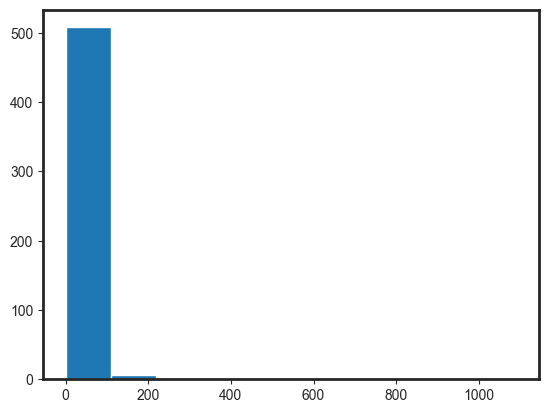

In [9]:
plt.hist(dt['area'])

(array([85., 64.,  0., 84.,  0., 95., 74.,  0., 54., 61.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

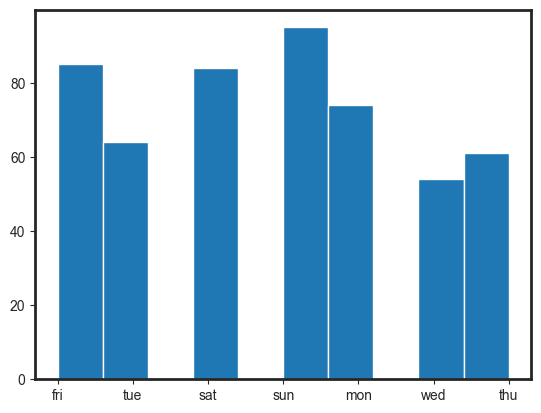

In [10]:
plt.hist(dt['day'])

Skewed area data, so will be applying transformation


In [11]:
import numpy as np

In [12]:
transform_dt=np.log([x+1 for x in dt['area']])

(array([275.,  61.,  59.,  54.,  29.,  21.,   9.,   6.,   1.,   2.]),
 array([0.        , 0.69956196, 1.39912393, 2.09868589, 2.79824785,
        3.49780981, 4.19737178, 4.89693374, 5.5964957 , 6.29605766,
        6.99561963]),
 <BarContainer object of 10 artists>)

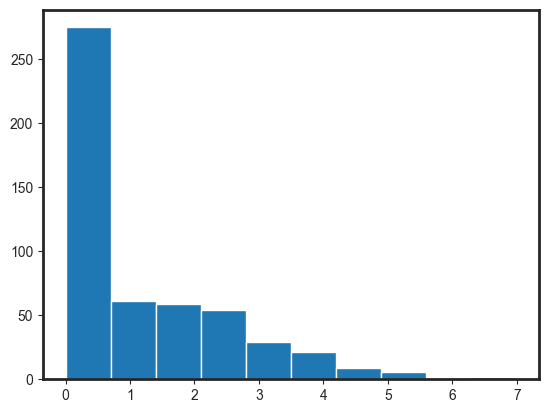

In [13]:
transform_dt
plt.hist(transform_dt)

Tranformed data after applying transformation of log(1+x) // Reason for that was some of the values had a 0 values which could be problematic.

Now we will try to apply simple neaural net and SVM to compare purfomance

In [14]:
dt.head

<bound method NDFrame.head of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

1)Simple Multiple linear regression== Y_hat=x1*w1+x2*w2+b
//Lets try x as following lat,long,month,day,ffmc,dmc,dc,ISI,temp,RH,Wind,rain
//and Y will be area and Y_hat would be pridicted value


In [15]:
X = dt[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
Y = transform_dt

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
model=LinearRegression()

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_hat=model.predict(x_test)

In [21]:
from slickml.metrics import RegressionMetrics

In [22]:
r=RegressionMetrics(y_test,y_hat)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,-0.044000,0.020000,1.238000,2.417000,0.385000,1690571763645293.000000,0.332000,nan,inf


TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 5 keyword-only arguments) were given

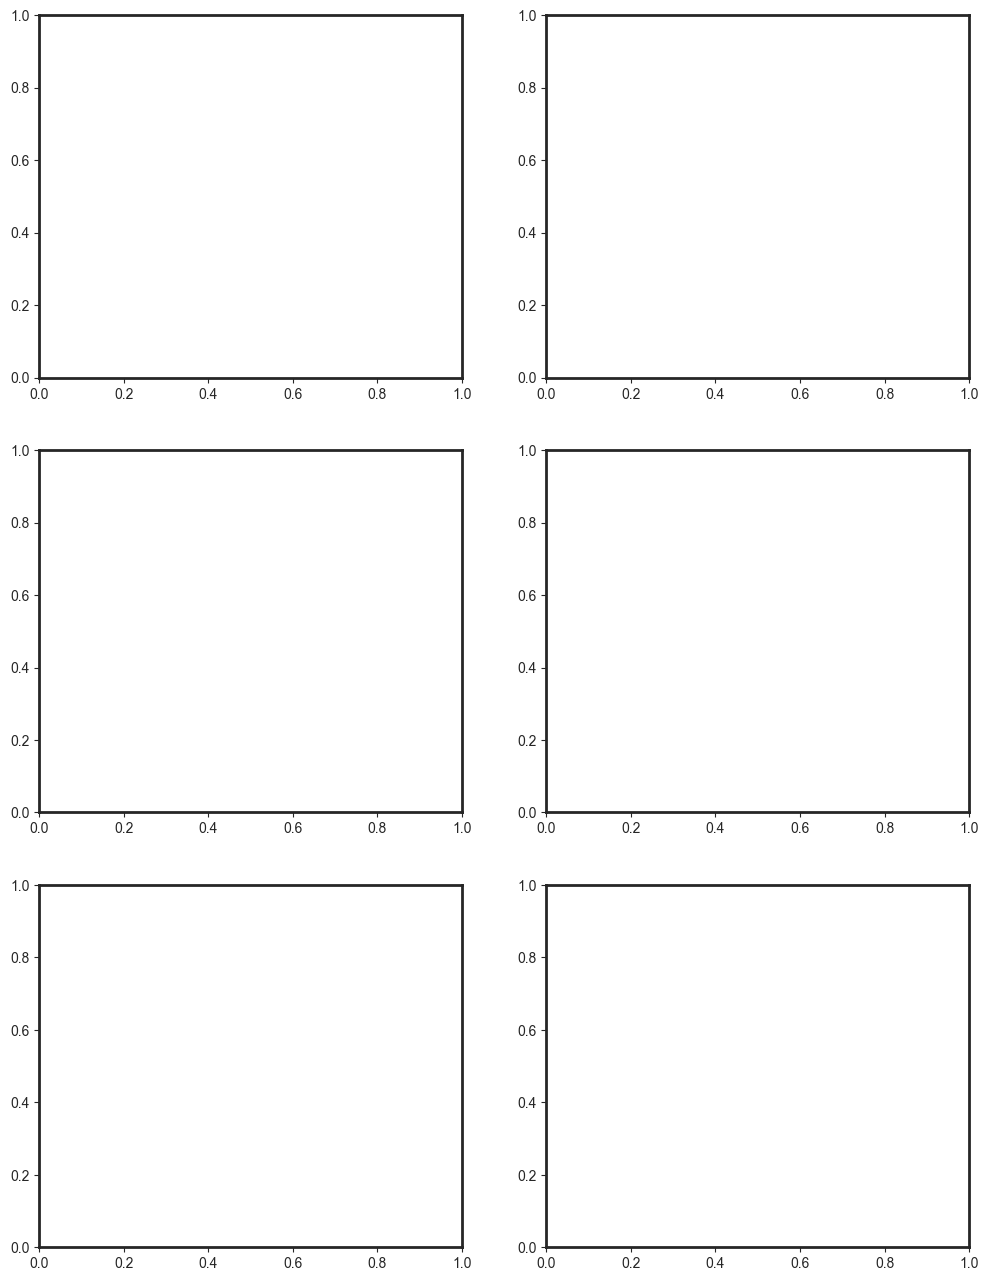

In [23]:
r.plot()

In [18]:
from sklearn.metrics import mean_absolute_error,r2_score
err=mean_absolute_error(y_pred=y_hat,y_true=y_test)

In [19]:
err
r2=r2_score(y_pred=y_hat,y_true=y_test)
r2

-0.016198323069586573

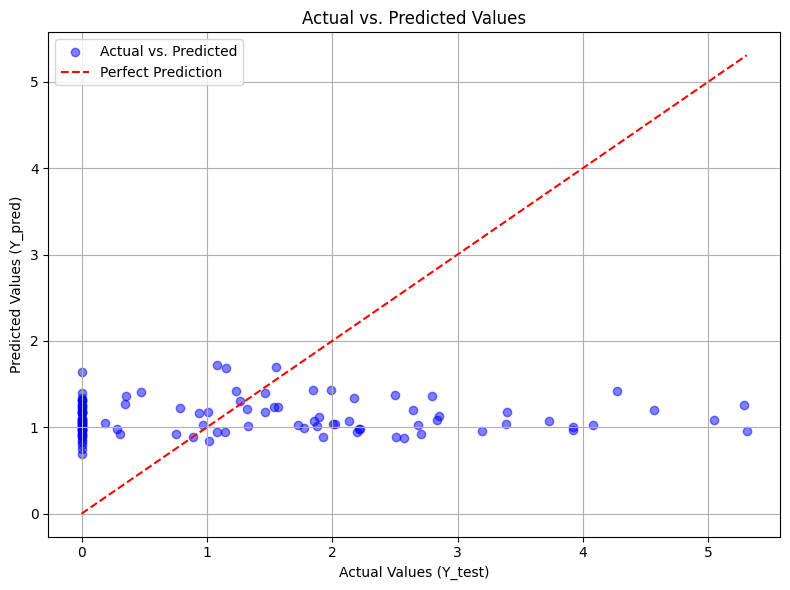

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_hat, alpha=0.5, color='b', label='Actual vs. Predicted')


# Add a diagonal line for reference (perfect prediction)
max_value = max(max(y_test), max(y_hat))
plt.plot([0, max_value], [0, max_value], linestyle='--', color='r', label='Perfect Prediction')

# Set axis labels and a legend
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.legend(loc='best')

# Add a title
plt.title('Actual vs. Predicted Values')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Now lets check variable for its significance

In [21]:
import statsmodels.api as st

In [22]:
X=st.add_constant(X)

In [23]:
model = st.OLS(Y, X).fit()

# Print the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.288
Date:                Thu, 14 Sep 2023   Prob (F-statistic):              0.247
Time:                        13:15:32   Log-Likelihood:                -901.28
No. Observations:                 517   AIC:                             1821.
Df Residuals:                     508   BIC:                             1859.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2224      1.360      0.163      0.8

//next will be making sense of the model summary

// now we will be using genetic algorithm to minimize one or two of the metric that we would want to minimize of maximize, that result in higher significance and that could maybe shed shome of the light on how significant variable it to for resultant algorithms

Transforming day and month into 1-of-c Enconding
https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

(array([ 69., 184., 172.,   9.,  17.,  32.,  20.,   2.,   9.,   3.]),
 array([ 7. ,  8.1,  9.2, 10.3, 11.4, 12.5, 13.6, 14.7, 15.8, 16.9, 18. ]),
 <BarContainer object of 10 artists>)

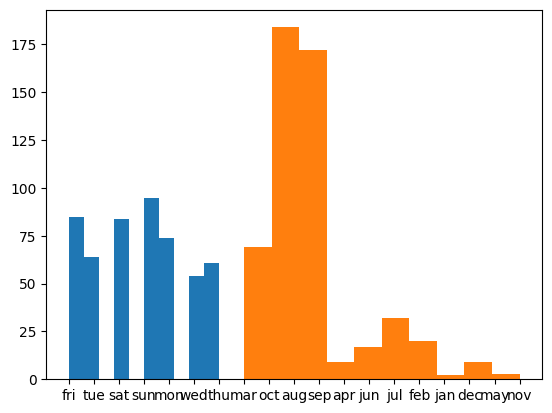

In [24]:
plt.hist(dt['day'])
plt.hist(dt['month'])

In [25]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [26]:
encoder=OrdinalEncoder()

In [27]:
from numpy import asarray

In [28]:
month_dt_ordi=asarray(dt['month'])

In [29]:
month_dt_ordi=month_dt_ordi.reshape(1,-1)

In [31]:
dt['month']

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [30]:
month_dt_ordi

array([['mar', 'oct', 'oct', 'mar', 'mar', 'aug', 'aug', 'aug', 'sep',
        'sep', 'sep', 'sep', 'aug', 'sep', 'sep', 'sep', 'mar', 'oct',
        'mar', 'apr', 'sep', 'sep', 'jun', 'aug', 'aug', 'aug', 'sep',
        'sep', 'sep', 'sep', 'sep', 'sep', 'sep', 'sep', 'sep', 'sep',
        'oct', 'oct', 'oct', 'mar', 'jul', 'aug', 'aug', 'sep', 'sep',
        'sep', 'sep', 'jul', 'mar', 'mar', 'sep', 'aug', 'aug', 'aug',
        'aug', 'sep', 'sep', 'oct', 'feb', 'feb', 'mar', 'mar', 'aug',
        'aug', 'aug', 'aug', 'sep', 'sep', 'sep', 'mar', 'mar', 'sep',
        'mar', 'aug', 'sep', 'feb', 'feb', 'mar', 'aug', 'aug', 'aug',
        'aug', 'aug', 'aug', 'aug', 'sep', 'sep', 'sep', 'sep', 'mar',
        'aug', 'mar', 'aug', 'aug', 'aug', 'sep', 'feb', 'mar', 'aug',
        'aug', 'aug', 'aug', 'aug', 'sep', 'jan', 'mar', 'mar', 'aug',
        'sep', 'sep', 'mar', 'mar', 'sep', 'sep', 'mar', 'mar', 'mar',
        'mar', 'mar', 'aug', 'aug', 'aug', 'sep', 'sep', 'sep', 'oct',
      

In [32]:
encoded_month=encoder.fit_transform(month_dt_ordi)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 517 BarContainer objects>)

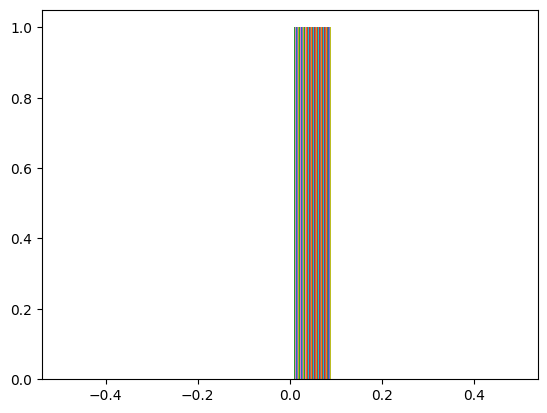

In [33]:
plt.hist(encoded_month)

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
encoder_one=OneHotEncoder(sparse=False)

In [36]:
data_one=np.asarray(dt['month'])

(array([ 69., 184., 172.,   9.,  17.,  32.,  20.,   2.,   9.,   3.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

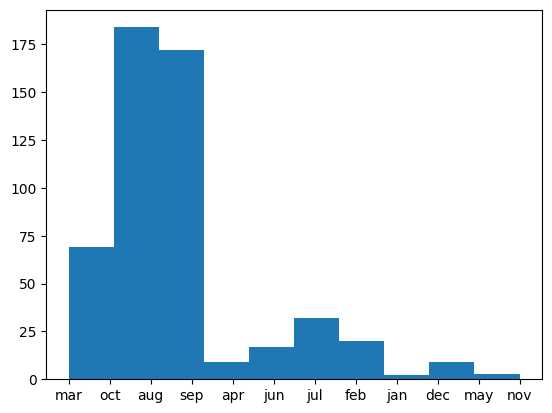

In [37]:
plt.hist(data_one)

In [38]:
data_one=data_one.reshape(1,-1)

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 517 BarContainer objects>)

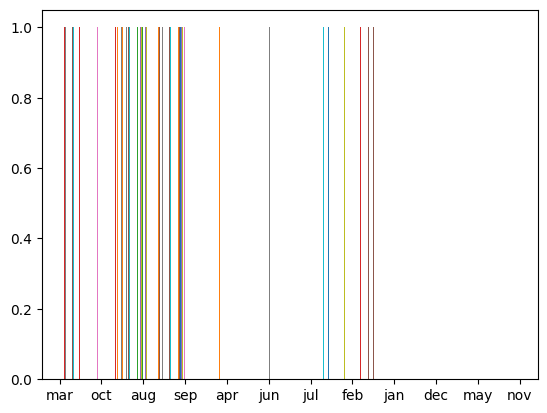

In [39]:
plt.hist(data_one)

In [40]:
transform_dt_one=encoder_one.fit_transform(data_one)

/Library/Python/3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
print(transform_dt_one)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 517 BarContainer objects>)

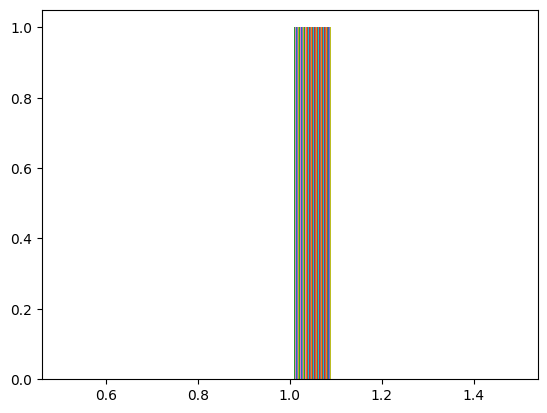

In [42]:
plt.hist(transform_dt_one)

// now that we know how to transform data into one-hot coded data lets trasform month and day into encoded data and apply regression

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 517 BarContainer objects>)

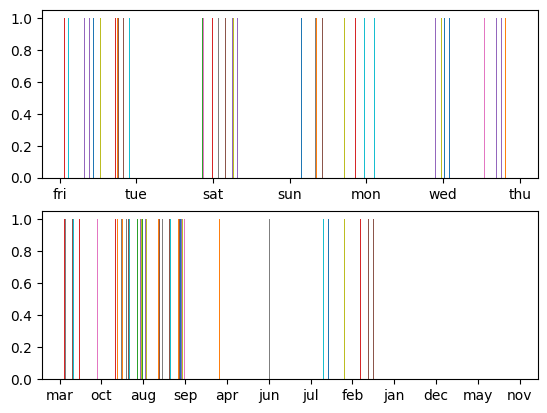

In [49]:
raw_day=asarray(dt['day'])
raw_month=asarray(dt['month'])
raw_day=raw_day.reshape(1,-1)
raw_month=raw_month.reshape(1,-1)
fig,axs=plt.subplots(2)
axs[0].hist(raw_day)
axs[1].hist(raw_month)

In [53]:
tranformed_day=encoder_one.fit_transform(data_one)
tranformed_month=encoder_one.fit_transform(raw_month)

/Library/Python/3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 517 BarContainer objects>)

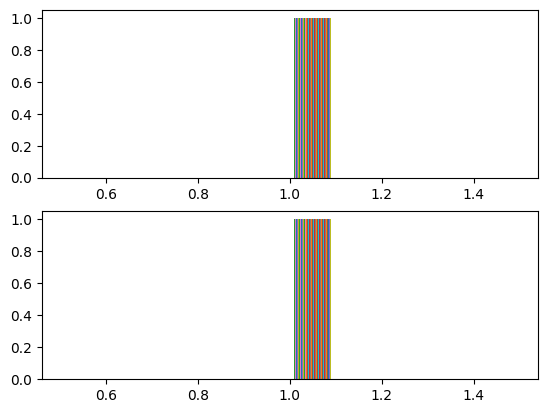

In [54]:
fig,axs=plt.subplots(2)
axs[0].hist(tranformed_day)
axs[1].hist(tranformed_month)